In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [243]:
SAMPLING_RATE = 50

# Read data from csv

In [244]:
dataframe = pd.read_csv("data/shaking_10-05-23_17-02-56.csv")

In [245]:
SAMLPE_LENGTH = round(dataframe['timestamp'].max() - dataframe['timestamp'].min(),4)

In [246]:
SAMLPE_LENGTH

8.3823

In [247]:
kernel = signal.gaussian(10,3)
kernel /= np.sum(kernel)

gaussian_df = dataframe.copy()

gaussian_df['acc_x'] = np.convolve(gaussian_df['acc_x'], kernel, 'same')
gaussian_df['grav_x'] = np.convolve(gaussian_df['grav_x'], kernel, 'same')

# FFT

In [248]:
spectrum_acc_x = np.abs(np.fft.fft(gaussian_df['acc_x']))
spectrum_acc_y = np.abs(np.fft.fft(dataframe['acc_y']))
spectrum_acc_z = np.abs(np.fft.fft(dataframe['acc_z']))
spectrum_gyr_x = np.abs(np.fft.fft(dataframe['gyr_x']))
spectrum_gyr_y = np.abs(np.fft.fft(dataframe['gyr_y']))
spectrum_gyr_z = np.abs(np.fft.fft(dataframe['gyr_z']))
spectrum_grav_x = np.abs(np.fft.fft(gaussian_df['grav_x']))
spectrum_grav_y = np.abs(np.fft.fft(dataframe['grav_y']))
spectrum_grav_z = np.abs(np.fft.fft(dataframe['grav_z']))



In [249]:
frequencies_acc_x = np.fft.fftfreq(len(gaussian_df['acc_x']), 1/SAMPLING_RATE)
frequencies_acc_y = np.fft.fftfreq(len(dataframe['acc_y']), 1/SAMPLING_RATE)
frequencies_acc_z = np.fft.fftfreq(len(dataframe['acc_z']), 1/SAMPLING_RATE)
frequencies_gyr_x = np.fft.fftfreq(len(dataframe['gyr_x']), 1/SAMPLING_RATE)
frequencies_gyr_y = np.fft.fftfreq(len(dataframe['gyr_y']), 1/SAMPLING_RATE)
frequencies_gyr_z = np.fft.fftfreq(len(dataframe['gyr_z']), 1/SAMPLING_RATE)
frequencies_grav_x = np.fft.fftfreq(len(gaussian_df['grav_x']), 1/SAMPLING_RATE)
frequencies_grav_y = np.fft.fftfreq(len(dataframe['grav_y']), 1/SAMPLING_RATE)
frequencies_grav_z = np.fft.fftfreq(len(dataframe['grav_z']), 1/SAMPLING_RATE)

In [250]:
mask_acc_x = frequencies_acc_x >= 0
mask_acc_y = frequencies_acc_y >= 0
mask_acc_z = frequencies_acc_z >= 0

mask_gyr_x = frequencies_gyr_x >= 0
mask_gyr_y = frequencies_gyr_y >= 0
mask_gyr_z = frequencies_gyr_z >= 0

mask_grav_x = frequencies_grav_x >= 0
mask_grav_y = frequencies_grav_y >= 0
mask_grav_z = frequencies_grav_z >= 0

In [251]:
frequency_acc_x = np.argmax(spectrum_acc_x[mask_acc_x]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_acc_y = np.argmax(spectrum_acc_y[mask_acc_y]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_acc_z = np.argmax(spectrum_acc_z[mask_acc_z]*SAMPLING_RATE)/SAMLPE_LENGTH

frequency_gyr_y = np.argmax(spectrum_gyr_y[mask_gyr_y]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_gyr_x = np.argmax(spectrum_gyr_x[mask_gyr_x]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_gyr_z = np.argmax(spectrum_gyr_z[mask_gyr_z]*SAMPLING_RATE)/SAMLPE_LENGTH

frequency_grav_y = np.argmax(spectrum_grav_y[mask_grav_y]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_grav_x = np.argmax(spectrum_grav_x[mask_grav_x]*SAMPLING_RATE)/SAMLPE_LENGTH
frequency_grav_z = np.argmax(spectrum_grav_z[mask_grav_z]*SAMPLING_RATE)/SAMLPE_LENGTH

In [252]:
print(frequency_acc_x)
print(frequency_acc_y)
print(frequency_acc_z)

print(frequency_gyr_x)
print(frequency_gyr_y)
print(frequency_gyr_z)

print(frequency_grav_x)
print(frequency_grav_y)
print(frequency_grav_z)

1.0736909917325792
1.0736909917325792
0.0
0.9543919926511816
1.0736909917325792
1.0736909917325792
0.0
0.0
0.0


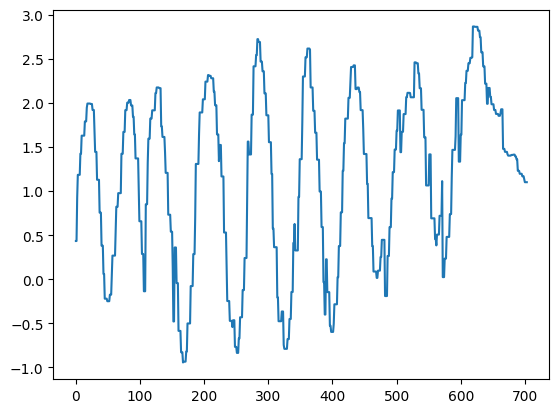

In [253]:
dataframe['grav_x'].plot()
plt.show()

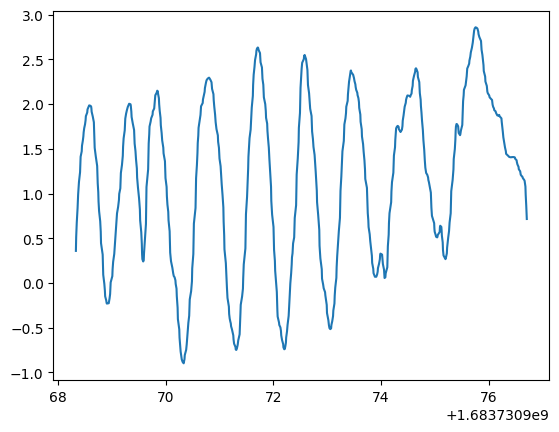

In [258]:
#gaussian_df["grav_x"].plot()
plt.plot(gaussian_df['timestamp'], gaussian_df["grav_x"])
plt.show()